In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/spam.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd

In [3]:
spam="/content/spam.csv"
df = pd.read_csv(spam, encoding='latin1')

In [4]:
df.sample(9)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5013,ham,Hello boytoy ! Geeee ... I'm missing you today...,NaN,NaN,NaN
4444,ham,"2 celebrate my båÕday, y else?",NaN,NaN,NaN
2896,ham,ÌÏ collecting ur laptop then going to configur...,NaN,NaN,NaN
202,ham,Your account has been refilled successfully by...,NaN,NaN,NaN
2231,ham,"K, wen ur free come to my home and also tel vi...",NaN,NaN,NaN
1502,ham,Don no da:)whats you plan?,NaN,NaN,NaN
2898,ham,"Aight, I should be there by 8 at the latest, p...",NaN,NaN,NaN
4267,ham,Hey so whats the plan this sat?,NaN,NaN,NaN
5407,ham,Yup he msg me: is tat yijue? Then i tot it's m...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(9)

,v1,v2
3090,spam,LORD OF THE RINGS:RETURN OF THE KING in store ...
866,ham,"Same here, but I consider walls and bunkers an..."
1505,ham,Total video converter free download type this ...
5014,ham,I think the other two still need to get cash b...
5263,ham,Pls speak with me. I wont ask anything other t...
1661,ham,"You aren't coming home between class, right? I..."
2684,ham,Yupz... I've oredi booked slots 4 my weekends ...
5443,spam,You have won a guaranteed 32000 award or maybe...
2355,ham,"Hello, my love ! How went your day ? Are you a..."


In [9]:
df.rename(columns = {'v1':'Target', 'v2':'Text'}, inplace = True)
df.sample(9)

,Target,Text
4024,ham,&lt;#&gt; in mca. But not conform.
842,ham,Our Prashanthettan's mother passed away last n...
5456,spam,\For the most sparkling shopping breaks from 4...
4254,spam,Block Breaker now comes in deluxe format with ...
4192,ham,Ok i'm coming home now.
834,ham,Surely result will offer:)
4635,ham,K k pa Had your lunch aha.
4986,ham,No rushing. I'm not working. I'm in school so ...
2233,ham,Good Morning plz call me sir


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
#check for duplicate values
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [16]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

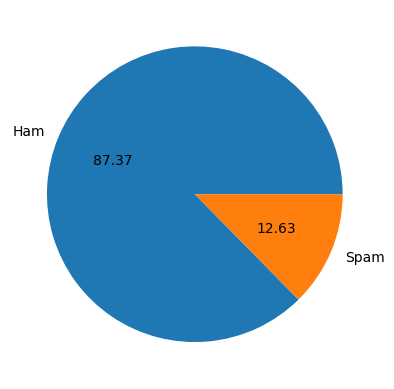

In [19]:
import matplotlib. pyplot as plt
plt.pie(df['Target'].value_counts(), labels = ["Ham", "Spam"], autopct = '%.2f')
plt.show()

In [20]:
import nltk